This Python-code runs the Python program 'run_polymer_simulation_once.ipynb' many times to obtain better statistics. The quantities averaged quantities are written in 'quantities_averaged.dat'. The analysis (plots) is done by 'result_representation.ipynb'.

# Import of libraries 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import datetime

# Set datetime and create subfolder for results

In [2]:
#set current date and time
DATETIME = datetime.datetime.now()
current_datetime = (str(DATETIME.year)+str(DATETIME.month)+str(DATETIME.day)+
                   str(DATETIME.hour)+str(DATETIME.minute)+str(DATETIME.second))

#create a folder for results (if not exists already)
try:
    os.makedirs("results")

except FileExistsError:
    #directory already exists
    pass

#create directory in folder 'results' to save results from every single simulation
os.makedirs("results/"+current_datetime)

In [3]:
#make short pathname for directory with results
path_results = "results/"+current_datetime+"/"

# Initialization and calculation of basic parameters

Initial parameters (fixed values for all simulation) are defined in the Initialization. Then, they are written to another python-file, 'init_parameters.ipynb'. The program 'run_polymer_simulation_once.ipynb' load this initial parameters from the file 'init_parameters.py' every time it is called. Attention: This extra file 'init_parameters.ipynb' is needed because a python program cannot load variables from this file ('main_code.ipynb') while it is run.

In [4]:
#define number of polymers segments (monomers)
Monomers = 50

#define number of bonds between segments
Bonds = Monomers - 1

#define spring constant (Rouse model) for bonds between segments in units energy/distance^2
k = 1

#define number of passive particles
n_passive_particles = 0

#define number of active particles
n_active_particles = 0

#define drag-coefficient constant gamma
gamma = 1

#define rest distance between segments
r0 = 0

#define temperature in units of kT
kT = 1

#define integration step time
dt = 0.01

#define numer of point for graphical representation and used for fits (number of callbacks)
number_of_points = 1000

In [5]:
#set epsilon and sigma for Lennard_jones potential between different particles
lj_epsilon_AA = 0
lj_sigma_AA = 0
lj_epsilon_AB = 0
lj_sigma_AB = 0
lj_epsilon_BB = 0
lj_sigma_BB = 0

#set cut-off radius for potential between two particles
r_cut = 2.5

In [6]:
#calculate Kuhn length b
Kuhn_length_b = math.sqrt(3*kT/k)

#calculate Rouse time (Rouse mode = 1)
tau_rouse_theory = gamma*Monomers**2*Kuhn_length_b**2 / (3*np.pi**2*kT)

In [7]:
#define number of integration steps (depends on dt, and Rouse-time); min. up to 4*Rouse-time
integration_steps = int(tau_rouse_theory/dt*10)

#set number of executions of one entire simulation
number_of_simulations = 100

In [8]:
#define maximum time
t_max = dt*integration_steps

Create file 'initial_values.py' and write the set parameters into it; this file is called every time when the simulation 'run_polymer_simulation_once.py' starts.

In [9]:
#write initial parameters in SAME directory as python-codes
file_init_parameters = open('initial_parameters.py', 'w')

init_parameters = (

    "current_datetime = "       +current_datetime+"\n"           +  
    "Monomers = "               +str(Monomers)+"\n"              +
    "Bonds = "                  +str(Bonds)+"\n"                 +
    "k = "                      +str(k)+"\n"                     +
    "n_passive_particles = "    +str(n_passive_particles)+"\n"   +
    "n_active_particles = "     +str(n_active_particles)+"\n"    +
    "lj_epsilon_AA = "          +str(lj_epsilon_AA)+"\n"         +
    "lj_sigma_AA = "            +str(lj_sigma_AA)+"\n"           +
    "lj_epsilon_AB = "          +str(lj_epsilon_AB)+"\n"         +
    "lj_sigma_AB = "            +str(lj_sigma_AB)+"\n"           +
    "lj_epsilon_BB = "          +str(lj_epsilon_BB)+"\n"         +
    "lj_sigma_BB = "            +str(lj_sigma_BB)+"\n"           +
    "r_cut = "                  +str(r_cut)+"\n"                 +
    "gamma = "                  +str(gamma)+"\n"                 +
    "r0 = "                     +str(r0)+"\n"                    +
    "kT = "                     +str(kT)+"\n"                    +
    "dt = "                     +str(dt)+"\n"                    +
    "integration_steps = "      +str(integration_steps)+"\n"     +
    "number_of_points = "       +str(number_of_points)+"\n"      +
    "number_of_simulations = "  +str(number_of_simulations)+"\n" +
    "Kuhn_length_b = "          +str(Kuhn_length_b)+"\n"         +
    "tau_rouse_theory = "       +str(tau_rouse_theory)+"\n"      +
    "t_max = "                  +str(t_max))

file_init_parameters.write(init_parameters)

file_init_parameters.close()


In [10]:
#save initial parameters also in 'results/current_datetime' directory as .py and as .dat

file_init_parameters = open(path_results+'initial_parameters.py', 'w')
file_init_parameters.write(init_parameters)
file_init_parameters.close()

file_init_parameters = open(path_results+'results.dat', 'w')
file_init_parameters.write(init_parameters)
file_init_parameters.close()

# Create empty file to safe simulated quantities and set every value to 0

In [11]:
#create empty file to called 'quantities_averaged.dat' to safe the simulated quantities
quantities_file = open(path_results+'quantities_averaged.dat', 'w')

for integration_step in range (0, int(integration_steps) + 2):
        
    #set all quantities to 0
    quantities_file.write('0	0	0	0\n')

#close the file
quantities_file.close()


# Run the entire simulation many times (using for-loop)

In [12]:
#run the entire simulation 'run_polymer_simulation_once.ipynb' many times
for run in range(number_of_simulations):
    
    #execute entire simulation
    print ("Step "+str(run+1)+" out of "+str(number_of_simulations))
    %run run_polymer_simulation_once.ipynb

Step 1 out of 100
HOOMD-blue 2.6.0 DOUBLE HPMC_MIXED TBB SSE SSE2 SSE3 
Compiled: 05/29/2019
Copyright (c) 2009-2019 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
** starting run **
Time 00:00:04 | Step 253302 / 253302 | TPS 52022.3 | ETA 00:00:00
Average TPS: 52017.4
---------
** run complete **
Step 2 out of 100
notice(2): Group "all" created containing 5

Time 00:00:04 | Step 253302 / 253302 | TPS 51362.8 | ETA 00:00:00
Average TPS: 51358.6
---------
** run complete **
Step 29 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
** starting run **
Time 00:00:04 | Step 253302 / 253302 | TPS 51436.4 | ETA 00:00:00
Average TPS: 51432.1
---------
** run complete **
Step 30 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
** starting run **
Time 00:00:04 | Step 253302 / 253302 | TPS 51349.7 | ETA 00:00:00
Average TPS: 51343.1
---------
** run complete **
Step 31 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
** starting run **
Time 00:00:04 | Step 253302 / 253302 | TPS 51244.5 | ETA 00:00:00
Average TPS: 51238.9
---------
** run complete **
Step 32 out of 100
notice(2): Group "all" created containing 5

** starting run **
Time 00:00:04 | Step 253302 / 253302 | TPS 51709.6 | ETA 00:00:00
Average TPS: 51705.5
---------
** run complete **
Step 59 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
** starting run **
Time 00:00:04 | Step 253302 / 253302 | TPS 51667.5 | ETA 00:00:00
Average TPS: 51663.2
---------
** run complete **
Step 60 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
** starting run **
Time 00:00:04 | Step 253302 / 253302 | TPS 51584.6 | ETA 00:00:00
Average TPS: 51580.4
---------
** run complete **
Step 61 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
** starting run **
Time 00:00:04 | Step 253302 / 253302 | TPS 51242.4 | ETA 00:00:00
Average TPS: 51238.3
---------
** run complete **
Step 62 out of 100
notice(2): Group "all" c

** starting run **
Time 00:00:05 | Step 253302 / 253302 | TPS 49805.1 | ETA 00:00:00
Average TPS: 49801.2
---------
** run complete **
Step 89 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
** starting run **
Time 00:00:04 | Step 253302 / 253302 | TPS 51085.8 | ETA 00:00:00
Average TPS: 51081.7
---------
** run complete **
Step 90 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
** starting run **
Time 00:00:04 | Step 253302 / 253302 | TPS 51253.8 | ETA 00:00:00
Average TPS: 51249.6
---------
** run complete **
Step 91 out of 100
notice(2): Group "all" created containing 50 particles
notice(2): integrate.langevin/bd is using specified gamma values
** starting run **
Time 00:00:05 | Step 253302 / 253302 | TPS 51062.5 | ETA 00:00:00
Average TPS: 51058.3
---------
** run complete **
Step 92 out of 100
notice(2): Group "all" c

# Run code that presents results

The simulation is done and numerical results are saved in .dat-file in 'results/current_datetime'. Now, 'result_representation.ipynb' is run to create results as plots. These results are also saved in 'results/current_datetime'.

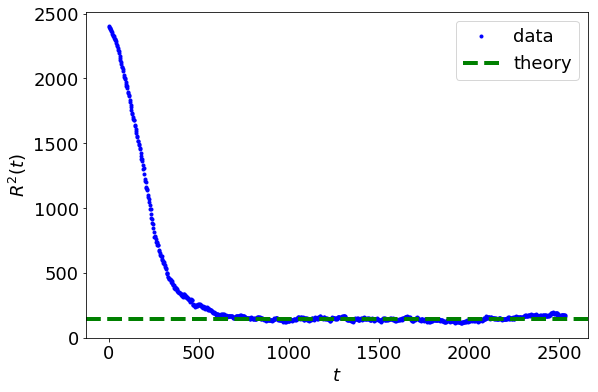

End-to-end distance in equilibrium (theory) = 146.99999999999997


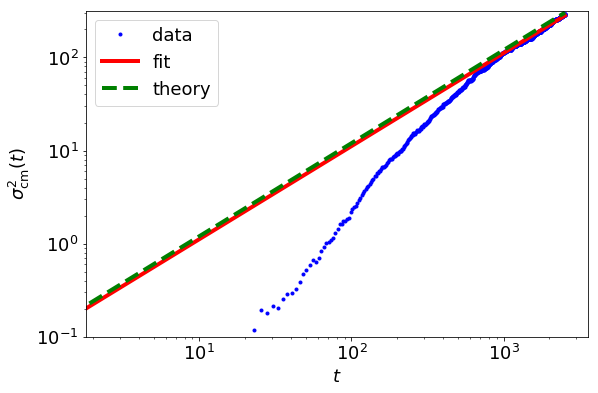

factor_sigma (theory)= 0.12
factor_sigma (simultaion)= [0.11155638]


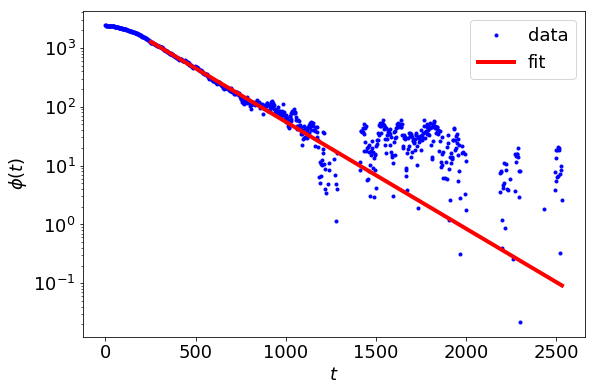

rouse time (theory) = 253.30295910584442
rouse time (simulation) = 239.22514153052867 +/- 1.2915132482744993


In [14]:
%run results_representation.ipynb